# Locate People and Objects

This notebook is part of [Lab 3](https://github.com/ee292d/labs/blob/main/lab3/README.md), which focuses on locating objects within an image, for the [EE292D Edge ML class](https://ee292d.github.io/) at Stanford. It shows how to download some pretrained models for person and object detection.

If you're not already in Google's Colab environment (or another notebook client) [click here to open it in Colab](https://colab.research.google.com/github/ee292d/labs/blob/main/lab3/notebook.ipynb).

## Install Ultralytics

We used [Ultralytics](https://github.com/ultralytics/ultralytics) for [Lab 2](https://github.com/ee292d/labs/blob/main/lab2/README.md), and since the project also offers some very efficient models for finding where objects are in a scene, we'll install it in this notebook too.

In [1]:
%pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 29.1/201.2 GB disk)


## Download and Run a Detection Model

In computer vision, the task of finding the locations of objects in a scene is known as "detection", which is different than the "classification" of images that we performed in the previous lab.

To understand the difference, "*Does this image contain a hot dog?*" is a classification question, but "*Does this image contain any hot dogs, and where are they?*" is detection. As you might imagine, detection is a harder task than classification, and understanding the output of the model is also more complicated.

Thankfully the Ultralytics team have created some classification models that offer good tradeoffs between accuracy and latency. We'll download one of them and run it on a test image.

In [2]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model('https://ultralytics.com/images/bus.jpg')
print(results[0].boxes)

100%|██████████| 6.23M/6.23M [00:00<00:00, 171MB/s]


100%|██████████| 476k/476k [00:00<00:00, 32.5MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 136.9ms
Speed: 17.9ms preprocess, 136.9ms inference, 753.9ms postprocess per image at shape (1, 3, 640, 480)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 5.,  0.,  0.,  0., 11.,  0.], device='cuda:0')
conf: tensor([0.8705, 0.8690, 0.8536, 0.8193, 0.3461, 0.3013], device='cuda:0')
data: tensor([[1.7286e+01, 2.3059e+02, 8.0152e+02, 7.6841e+02, 8.7054e-01, 5.0000e+00],
        [4.8739e+01, 3.9926e+02, 2.4450e+02, 9.0250e+02, 8.6898e-01, 0.0000e+00],
        [6.7027e+02, 3.8028e+02, 8.0986e+02, 8.7569e+02, 8.5360e-01, 0.0000e+00],
        [2.2139e+02, 4.0579e+02, 3.4472e+02, 8.5739e+02, 8.1931e-01, 0.0000e+00],
        [6.4347e-02, 2.5464e+02, 3.2288e+01, 3.2504e+02, 3.4607e-01, 1.1000e+01],
        [0.0000e+00, 5.5101e+02, 6.7105e+01, 8.7394e+02, 3.0129e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([6, 6])
xywh: tensor([[409.4020, 499.4990,

This gives us the numerical information about the object names, scores, and locations, but it's not easy to make sense in this form. To help, we can plot the results on the original image.

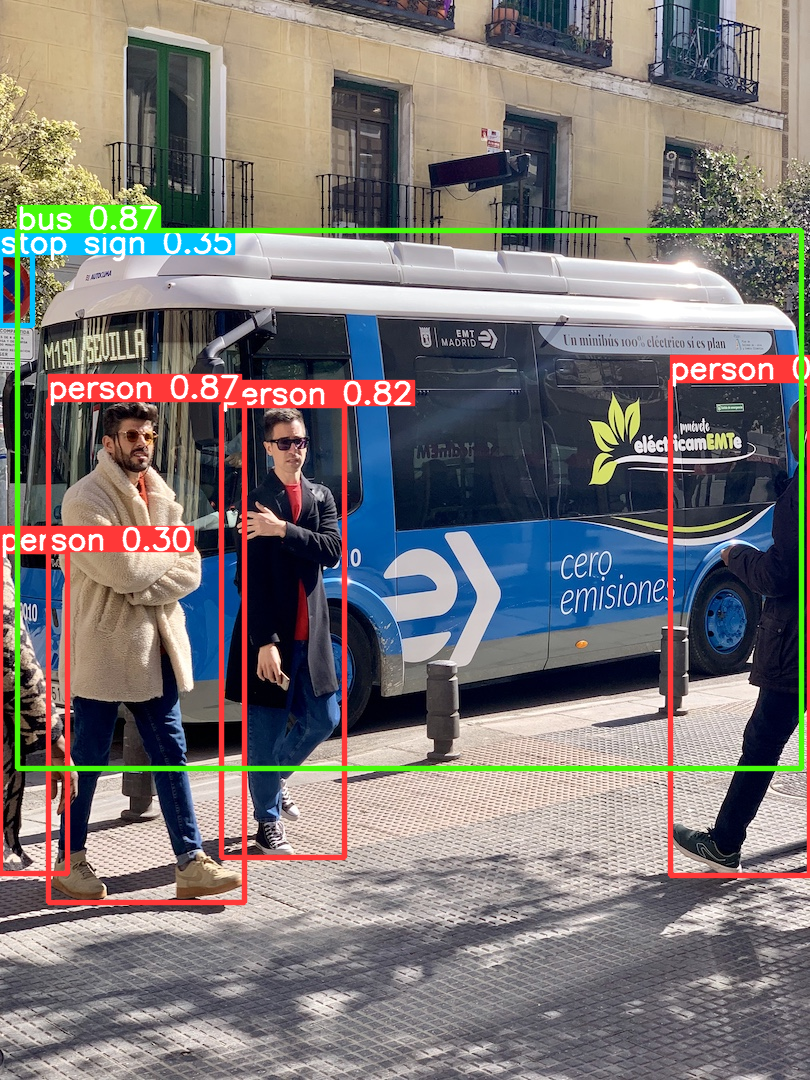

In [3]:
from PIL import Image as im

# We need to switch from BGR to RGB channel order.
bgr_array = results[0].plot()
rgb_array = bgr_array[:, :, ::-1]

im.fromarray(rgb_array)

## Exporting to TensorFlow Lite

We want to run this model as fast as possible on our Raspberry Pi, and TensorFlow Lite offers an efficient inference framework designed for phones and boards like the Pi. We do need to export it from the Ultralytics format into a file TF Lite can understand though. As with the classification notebook, we'll do this by running Ultralytics export function targeting TF Lite and 8-bit quantization. The process can take several minutes, and you can expect to see a `StatusCode` error at the end, but that shouldn't affect the overall output since it happens after the files we need are saved.

In [4]:
model.export(format='tflite', int8=True)

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>=1.15.4,<=1.17.5', 'sng4onnx>=1.0.1', 'onnxsim>=0.4.33', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 126.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 312.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 246.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 185.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 175.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 MB 187.3 MB/s eta 0:00:00
     ━

100%|██████████| 1.11M/1.11M [00:00<00:00, 45.9MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 41.58file/s]


ONNX: starting export with onnx 1.16.0 opset 17...


ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 1.3s, saved as 'yolov8n.onnx' (12.3 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...

Automatic generation of each OP name started ========================================
Automatic generation of each OP name complete!

Model loaded ========================================================================

Model conversion started ============================================================
saved_model output started ==========================================================
saved_model output complete!
Float32 tflite output complete!
Float16 tflite output complete!
Input signature information for quantization
signature_name: serving_default
input_name.0: images shape: (1, 640, 640, 3) dtype: <dtype: 'float32'>
Dynamic Range Quantization tflite output complete!
INT8 Quantization tflite output complete!
Full INT8 Quantization tflite output complete!
INT8 Quantization with int16 activations tflite outp

ImportError: generic_type: cannot initialize type "StatusCode": an object with that name is already defined

## Download the Model

After the export has been run, you'll need to find the output file. To do this, open the file explorer from the icon on the left side of the notebook, and navigate to the `yolov8n_saved_model` folder. In there you should see a `yolov8n_in8.tflite` file. Right click on it and select "Download" to save it to your laptop.

Once that's complete, drag it to the `models` folder in your VS Code editor, and then return to the [Lab 3 instructions](https://github.com/ee292d/labs/tree/main/lab3#locate-people-and-objects)
to run it on your board. You'll continue this notebook once you've given that a try.

## Shrink the Input Size

Welcome back from the readme. As you'll have seen on the Pi, the model takes over 400ms to run. A lot of this is because it's processing a 640 pixel by 640 pixel image. If we can convert the model to a smaller input image, we should be able to speed things up dramatically. In this step, we're going to retrain the model to use a 224 pixel square input image.

Thankfully the YOLOv8 model is entirely convolutional, which means it needs minimal training to adapt to a new input image size. In this call we're going to specify the required image size, indicate that we'll use the pretrained weights, freeze most of the layers, and only run one epoch of training on a very small dataset. This will still take a few minutes to complete, but at the end we should have a resized model that retains a lot of the accuracy of the original.

In [20]:
train_results = model.train(data="coco128.yaml", imgsz=224, pretrained=True, freeze=10, epochs=1)
save_dir = train_results.save_dir

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train533, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs/detect/train533/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/detect/train533
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1     0.782G       1.25      1.187      1.121         95        224: 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]


                   all        128        929      0.653      0.486      0.525      0.389

1 epochs completed in 0.005 hours.
Optimizer stripped from runs/detect/train533/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train533/weights/best.pt, 6.5MB

Validating runs/detect/train533/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]


                   all        128        929      0.652      0.501      0.524       0.39
                person        128        254      0.701      0.512      0.551      0.373
               bicycle        128          6      0.548      0.167      0.167      0.167
                   car        128         46      0.719      0.109      0.102     0.0758
            motorcycle        128          5       0.83      0.977      0.962      0.872
              airplane        128          6      0.658          1      0.942      0.775
                   bus        128          7      0.674      0.593      0.679      0.616
                 train        128          3       0.54          1      0.995      0.913
                 truck        128         12      0.933      0.333       0.35      0.216
                  boat        128          6      0.382      0.623      0.501      0.315
         traffic light        128         14      0.712      0.143      0.148      0.104
             stop sig

## Test the Small Model

We'll run a sanity check here to make sure that the model we've retrained still works as expected. You'll see an image plotting the results below, and it should be very similar to the output of the original model, apart from missing one partial person on the right of the frame.

If this works, then we're ready to export the new model.


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 224x192 3 persons, 1 bus, 15.9ms
Speed: 0.8ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 192)


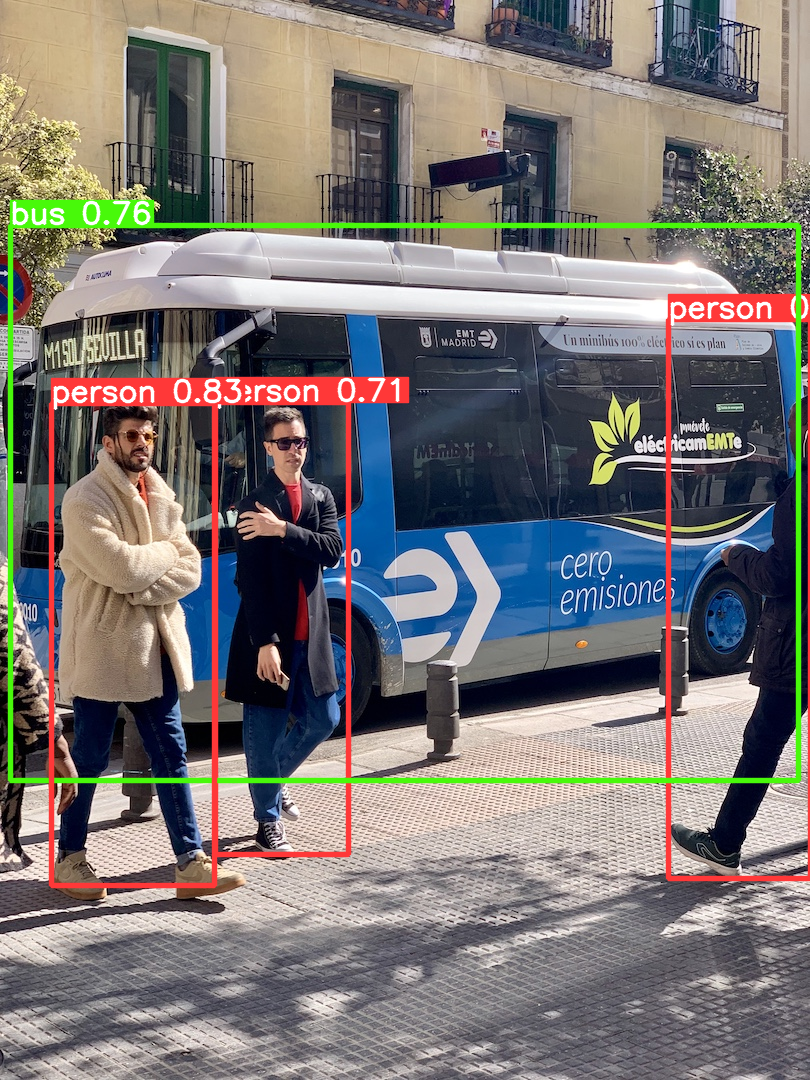

In [17]:
smaller_model = YOLO(str(save_dir) + "/weights/best.pt")
results = smaller_model('https://ultralytics.com/images/bus.jpg')

bgr_array = results[0].plot()
rgb_array = bgr_array[:, :, ::-1]
im.fromarray(rgb_array)

## Export the Small Model

We'll use the same approach we did above to save out the TF Lite version of the model.

In [21]:
smaller_model.export(format='tflite', int8=True)

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train53/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 84, 1029) (6.2 MB)

TensorFlow SavedModel: starting export with tensorflow 2.15.0...
WARNING ⚠️ tensorflow<=2.13.1 is required, but tensorflow==2.15.0 is currently installed https://github.com/ultralytics/ultralytics/issues/5161

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: simplifying with onnxsim 0.4.36...
ONNX: export success ✅ 1.3s, saved as 'runs/detect/train53/weights/best.onnx' (12.1 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.17.5...

Automatic generation of each OP name started ========================================
Automatic generation of each OP name complete!

Model loaded ========================================================================

Model conversion started ============================================================
save

ImportError: generic_type: cannot initialize type "StatusCode": an object with that name is already defined

## Download the Small Model

You'll need to locate the `best_int8.tflite` model in the file explorer to the left. This can be a bit tricky, since it will be saved in the `runs/detect/<latest run>/weights/best_saved_model` folder, where "latest run" is the most recent folder at that level. Here's an example where my latest run was train53:




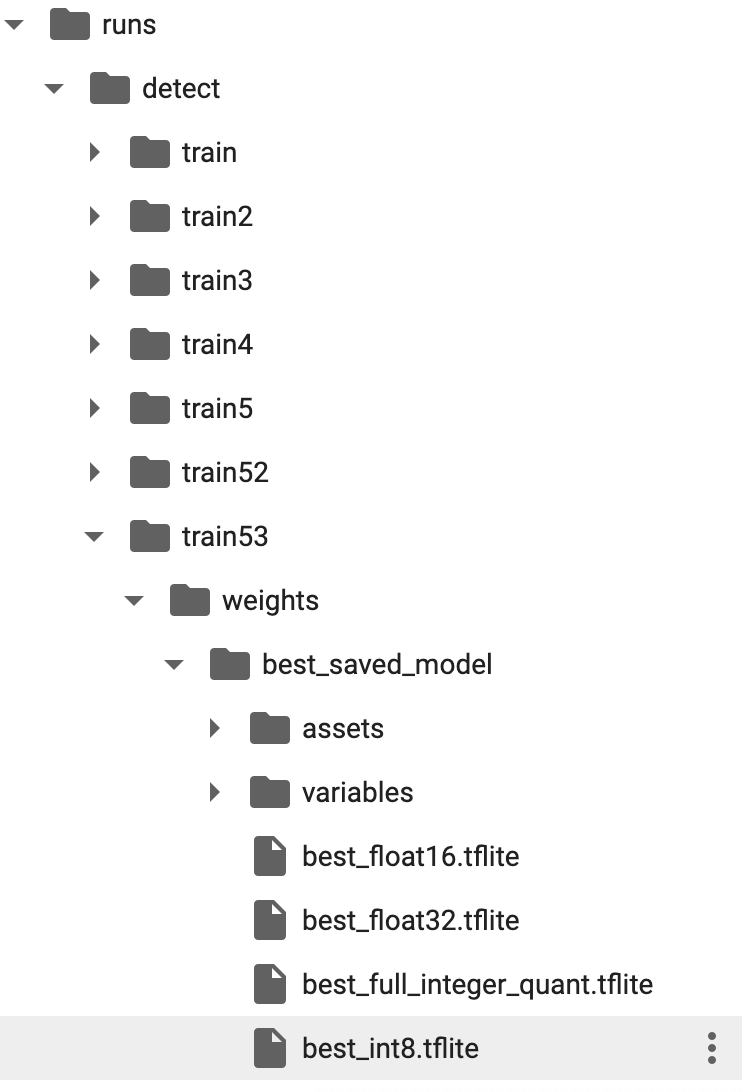

After you've downloaded the model to your laptop, rename it to `yolov8n_224.tflite` and drag it to the models folder in VS Code to upload it to the Pi. If you run

```bash
python locate_objects.py --model_file=../models/yolov8n_224_int8.tflite --image=../images/bus.jpg
```

from the `labs3` folder, you should see output like this:

```bash
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
bus: 0.93 (114, 103) 219x116
person: 0.86 (36, 134) 47x105
person: 0.75 (79, 130) 34x94
person: 0.68 (204, 120) 39x122
time: 24.982ms
```

As you can see, the inference time is dramatically lower, but the accuracy remains similar.

## Train a Custom Model

Most applications are likely to need a model that can recognize more than the standard 80 kinds of objects that COCO supports by default. To enable this, you'll first need to gather your own dataset of images with ground truth labels for the objects and their locations. You'll also need to make sure that the dataset is in the [Ultralytics YOLO format](https://docs.ultralytics.com/datasets/detect/#ultralytics-yolo-format).

To show you how this works, I'm going to use a pre-built dataset of different African wildlife, but you should be able to use the same approach with your own dataset once you have one. You'll have to create your own YAML file with the labels, and ensure there's a .txt file with box information for every image, but hopefully you should be able to see from the documentation and the layout here what you need to do.

In [45]:
!wget -q -O datasets/african-wildlife.zip https://ultralytics.com/assets/african-wildlife.zip
!unzip -qq -o datasets/african-wildlife.zip -d datasets/african-wildlife
!wget -q -O datasets/african-wildlife.yaml https://github.com/ultralytics/ultralytics/raw/main/ultralytics/cfg/datasets/african-wildlife.yaml

The training itself will take a few minutes to complete.

In [47]:
train_results = model.train(data="datasets/african-wildlife.yaml", imgsz=224, pretrained=True, freeze=9, epochs=100)
save_dir = train_results.save_dir

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/african-wildlife.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5334, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=9, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/datasets/african-wildlife/train/labels.cache... 1052 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1052/1052 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/african-wildlife/valid/labels.cache... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5334/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/detect/train5334
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      0.87G     0.8552      1.041      1.019         24        224: 100%|██████████| 66/66 [00:07<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]


                   all        225        379      0.858      0.735      0.858      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.872G     0.8579      1.039      1.022         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]


                   all        225        379      0.789      0.698      0.811      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      0.83G     0.8759      1.036      1.025         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.55it/s]


                   all        225        379      0.789      0.699      0.814      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.828G     0.8697      1.016      1.026         16        224: 100%|██████████| 66/66 [00:05<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.28it/s]


                   all        225        379      0.795      0.731      0.827       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.826G     0.8613      0.946      1.019         21        224: 100%|██████████| 66/66 [00:05<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]


                   all        225        379      0.825      0.776      0.871       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.826G     0.8549     0.9064      1.013         31        224: 100%|██████████| 66/66 [00:05<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]


                   all        225        379      0.778      0.786      0.857      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.826G     0.8605     0.9088       1.02         21        224: 100%|██████████| 66/66 [00:05<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]


                   all        225        379       0.86      0.751      0.855      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.826G      0.837     0.8613      1.004         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.61it/s]


                   all        225        379       0.74      0.784      0.841      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.826G     0.8388     0.8536      1.006         42        224: 100%|██████████| 66/66 [00:05<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.27it/s]

                   all        225        379       0.83      0.799      0.879      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.826G     0.8207      0.836     0.9951         14        224: 100%|██████████| 66/66 [00:05<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        225        379      0.887      0.702      0.865      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.826G     0.8196     0.8138      1.002         15        224: 100%|██████████| 66/66 [00:05<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]


                   all        225        379      0.845      0.766      0.885      0.662

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.826G      0.792     0.7492     0.9783         22        224: 100%|██████████| 66/66 [00:05<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        225        379      0.862      0.802      0.894       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.826G      0.811     0.7509     0.9904         23        224: 100%|██████████| 66/66 [00:05<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]


                   all        225        379      0.868      0.797      0.893      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.826G     0.8023     0.7759     0.9897         25        224: 100%|██████████| 66/66 [00:05<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.53it/s]


                   all        225        379      0.832      0.822      0.893      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.826G     0.7962     0.7228     0.9775         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]


                   all        225        379      0.818      0.785      0.877       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.826G     0.7809     0.7006     0.9764         22        224: 100%|██████████| 66/66 [00:05<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.57it/s]

                   all        225        379      0.857      0.806      0.899      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.826G     0.7845     0.6992     0.9841         23        224: 100%|██████████| 66/66 [00:05<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        225        379       0.83      0.807      0.884      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.826G     0.7597      0.696     0.9722         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.75it/s]

                   all        225        379      0.802      0.799      0.874      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.826G       0.77     0.6802     0.9706         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]

                   all        225        379       0.85      0.746      0.872      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.826G     0.7689     0.6693     0.9693         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.17it/s]

                   all        225        379      0.855      0.809      0.894      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.826G     0.7681     0.6729     0.9737         14        224: 100%|██████████| 66/66 [00:05<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]

                   all        225        379      0.859       0.81       0.89      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.826G     0.7574     0.6443     0.9659         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]

                   all        225        379      0.874      0.806      0.898      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.826G     0.7499      0.635      0.964         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.59it/s]


                   all        225        379      0.855      0.759      0.881      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.826G     0.7383     0.6257     0.9564         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        225        379       0.86      0.813      0.899      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.826G     0.7381     0.6453     0.9608         23        224: 100%|██████████| 66/66 [00:05<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        225        379      0.873      0.821      0.893      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.826G     0.7475     0.6123      0.956         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.60it/s]


                   all        225        379      0.854      0.841      0.897      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.826G     0.7131     0.6113     0.9427         15        224: 100%|██████████| 66/66 [00:05<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.86it/s]

                   all        225        379       0.83      0.845      0.881      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.826G     0.7304     0.6165     0.9494         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all        225        379      0.903        0.8      0.896      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.826G     0.7232     0.5805     0.9522         16        224: 100%|██████████| 66/66 [00:05<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]


                   all        225        379      0.887      0.793        0.9      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.826G     0.7137     0.5794     0.9443         21        224: 100%|██████████| 66/66 [00:05<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.77it/s]

                   all        225        379      0.848       0.78      0.889       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.826G     0.7089     0.5748     0.9412         16        224: 100%|██████████| 66/66 [00:05<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.82it/s]

                   all        225        379      0.871      0.816      0.898      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.826G     0.6984     0.5697     0.9481         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all        225        379      0.853      0.785      0.891      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.826G     0.7167     0.5847      0.951         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.46it/s]

                   all        225        379      0.831      0.865      0.904      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.826G     0.7048     0.5575     0.9401         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        225        379      0.883      0.819      0.906      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.826G     0.7002     0.5446     0.9466         17        224: 100%|██████████| 66/66 [00:05<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]


                   all        225        379      0.874      0.767      0.878      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.826G     0.6994     0.5631     0.9353         15        224: 100%|██████████| 66/66 [00:05<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        225        379      0.872      0.799      0.894      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.826G     0.6933     0.5398     0.9391         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]

                   all        225        379      0.887      0.839      0.903      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.826G     0.6889     0.5346     0.9359         27        224: 100%|██████████| 66/66 [00:05<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]


                   all        225        379      0.862      0.839      0.903      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.826G     0.6988     0.5458     0.9299         16        224: 100%|██████████| 66/66 [00:05<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.12it/s]

                   all        225        379      0.938      0.808      0.912      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.826G     0.6807     0.5205     0.9347         33        224: 100%|██████████| 66/66 [00:05<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        225        379      0.889      0.831      0.907      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.826G     0.6689     0.5305     0.9338         34        224: 100%|██████████| 66/66 [00:05<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        225        379      0.921      0.796      0.908      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.826G     0.6815     0.5222     0.9253         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.68it/s]

                   all        225        379      0.856      0.831      0.903      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.826G     0.6741     0.5141     0.9332         25        224: 100%|██████████| 66/66 [00:05<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        225        379        0.9      0.789        0.9      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.826G      0.678     0.5124      0.931         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        225        379      0.915      0.807      0.907      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.826G     0.6999     0.5209      0.939         25        224: 100%|██████████| 66/66 [00:05<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.58it/s]

                   all        225        379      0.851      0.795      0.884      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.826G     0.6759     0.5166     0.9228         21        224: 100%|██████████| 66/66 [00:06<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]


                   all        225        379      0.879      0.812      0.897      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.826G     0.6709     0.4994     0.9276         19        224: 100%|██████████| 66/66 [00:06<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.09it/s]

                   all        225        379      0.892      0.796      0.898      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.826G     0.6678     0.4956     0.9271         20        224: 100%|██████████| 66/66 [00:06<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.64it/s]

                   all        225        379      0.836       0.83      0.895      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.826G     0.6709      0.497     0.9259         24        224: 100%|██████████| 66/66 [00:06<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.76it/s]


                   all        225        379       0.91      0.813      0.904      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.826G     0.6816     0.5058     0.9307         21        224: 100%|██████████| 66/66 [00:05<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.03it/s]

                   all        225        379      0.883      0.812      0.896      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.826G      0.658     0.4986     0.9295         23        224: 100%|██████████| 66/66 [00:05<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.98it/s]


                   all        225        379      0.862      0.811      0.894      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.826G     0.6591     0.4886     0.9205         19        224: 100%|██████████| 66/66 [00:06<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]

                   all        225        379      0.883      0.827      0.909      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.826G     0.6571     0.4901     0.9284         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.02it/s]

                   all        225        379      0.851      0.831      0.901      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.826G     0.6543     0.4908     0.9166         25        224: 100%|██████████| 66/66 [00:06<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

                   all        225        379      0.838      0.856        0.9      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.826G     0.6596     0.4941     0.9144         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.68it/s]

                   all        225        379      0.872       0.84      0.903      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.826G      0.643     0.4735     0.9228         16        224: 100%|██████████| 66/66 [00:05<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.37it/s]

                   all        225        379      0.891      0.805      0.901      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.826G     0.6484     0.4841      0.918         19        224: 100%|██████████| 66/66 [00:06<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.98it/s]

                   all        225        379      0.897      0.782      0.896      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.826G     0.6496     0.4674     0.9144         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.62it/s]

                   all        225        379      0.846      0.851      0.911      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.826G     0.6326      0.451     0.9089         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]

                   all        225        379      0.869      0.835      0.909      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.826G     0.6308     0.4662     0.9107         17        224: 100%|██████████| 66/66 [00:05<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]

                   all        225        379      0.867      0.837      0.904      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.826G     0.6403     0.4546     0.9135         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.88it/s]


                   all        225        379      0.891      0.807      0.906      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.826G     0.6354      0.463     0.9061         25        224: 100%|██████████| 66/66 [00:05<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]

                   all        225        379      0.875      0.849      0.909      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.826G     0.6332     0.4518     0.9057         24        224: 100%|██████████| 66/66 [00:05<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]

                   all        225        379      0.858      0.852      0.899      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.826G     0.6266     0.4437     0.9097         17        224: 100%|██████████| 66/66 [00:05<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]

                   all        225        379      0.886      0.844      0.906      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.826G     0.6257     0.4479     0.9091         20        224: 100%|██████████| 66/66 [00:06<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.20it/s]

                   all        225        379      0.912       0.79      0.905      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.826G     0.6182     0.4508     0.9041         15        224: 100%|██████████| 66/66 [00:05<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.08it/s]

                   all        225        379      0.888      0.807      0.903      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.826G     0.6204     0.4467     0.9095         13        224: 100%|██████████| 66/66 [00:05<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.22it/s]

                   all        225        379      0.862      0.832      0.904      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.826G     0.6239     0.4536     0.9039         24        224: 100%|██████████| 66/66 [00:05<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.07it/s]

                   all        225        379      0.879      0.805      0.898      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.826G     0.6252     0.4494     0.9115         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.70it/s]


                   all        225        379      0.889      0.814       0.91      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.826G     0.6058      0.432     0.8969         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        225        379      0.885      0.819      0.903       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.826G     0.6179     0.4385     0.9058         14        224: 100%|██████████| 66/66 [00:05<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.78it/s]

                   all        225        379      0.857      0.868      0.914      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.826G     0.6171     0.4266     0.9008         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.65it/s]


                   all        225        379      0.892      0.848      0.913      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.826G     0.6169     0.4342     0.8975         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.95it/s]

                   all        225        379       0.92      0.831      0.918      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.826G     0.6064     0.4283     0.9011         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.51it/s]

                   all        225        379       0.89      0.864      0.921      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.826G     0.6221     0.4328     0.9038         22        224: 100%|██████████| 66/66 [00:05<00:00, 11.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.80it/s]


                   all        225        379      0.915      0.804      0.913      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.826G     0.6072     0.4314     0.9006         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.83it/s]

                   all        225        379      0.896      0.829      0.911      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.826G     0.5965     0.4198     0.8951         17        224: 100%|██████████| 66/66 [00:05<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]

                   all        225        379      0.886      0.832      0.908      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.826G      0.608     0.4164     0.9036         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.99it/s]

                   all        225        379      0.861      0.828      0.906      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.826G     0.6125     0.4233      0.896         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.56it/s]


                   all        225        379      0.884      0.855      0.913      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.826G     0.6023     0.4272     0.8905         26        224: 100%|██████████| 66/66 [00:05<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

                   all        225        379      0.874      0.836      0.913      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.826G       0.59     0.3979     0.8974         17        224: 100%|██████████| 66/66 [00:05<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        225        379      0.887      0.822      0.906      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.826G     0.5976     0.4181     0.8954         26        224: 100%|██████████| 66/66 [00:05<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        225        379      0.891      0.845      0.916      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.826G     0.5961     0.4068     0.8975         29        224: 100%|██████████| 66/66 [00:05<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]

                   all        225        379      0.875      0.847       0.91      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.826G     0.5887     0.4084     0.8904         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.72it/s]

                   all        225        379      0.912      0.814      0.912      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.826G     0.5933     0.4113      0.896         21        224: 100%|██████████| 66/66 [00:05<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        225        379      0.871       0.84      0.916      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.826G     0.5824     0.4035     0.8879         16        224: 100%|██████████| 66/66 [00:05<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.67it/s]


                   all        225        379      0.859      0.841      0.909      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.826G     0.5908     0.4077     0.8931         38        224: 100%|██████████| 66/66 [00:05<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]


                   all        225        379      0.898      0.793      0.907      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.826G     0.5953     0.4124     0.8933         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]


                   all        225        379      0.874      0.826      0.907      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.826G     0.5862     0.4045     0.8942         22        224: 100%|██████████| 66/66 [00:05<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.97it/s]

                   all        225        379      0.862       0.85      0.908      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.826G     0.5832     0.3923     0.8881         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.93it/s]

                   all        225        379      0.901      0.812      0.905      0.723


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.826G     0.5691     0.3948     0.8836         18        224: 100%|██████████| 66/66 [00:07<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.89it/s]

                   all        225        379      0.872      0.843      0.908      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.826G     0.5875     0.3979     0.8901         28        224: 100%|██████████| 66/66 [00:05<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]

                   all        225        379      0.869      0.837      0.907      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.826G     0.5852     0.3926     0.8922         17        224: 100%|██████████| 66/66 [00:05<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.09it/s]

                   all        225        379      0.895      0.821      0.914       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.826G     0.5834     0.4006     0.8852         24        224: 100%|██████████| 66/66 [00:05<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.35it/s]

                   all        225        379      0.891      0.833      0.914      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.826G     0.5741     0.3946     0.8905         20        224: 100%|██████████| 66/66 [00:05<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.96it/s]

                   all        225        379      0.877      0.841      0.913      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.826G      0.568     0.3937     0.8874         18        224: 100%|██████████| 66/66 [00:05<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.31it/s]

                   all        225        379      0.874      0.836      0.913      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.826G     0.5784      0.389     0.8864         21        224: 100%|██████████| 66/66 [00:05<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.94it/s]

                   all        225        379      0.872      0.845      0.911      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.826G     0.5876     0.3984     0.8888         29        224: 100%|██████████| 66/66 [00:05<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]

                   all        225        379      0.888      0.834      0.913      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.826G     0.5713     0.3944     0.8858         23        224: 100%|██████████| 66/66 [00:05<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.01it/s]

                   all        225        379      0.874       0.83      0.909      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.826G     0.5775     0.3863     0.8908         19        224: 100%|██████████| 66/66 [00:05<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.03it/s]

                   all        225        379      0.887      0.821       0.91      0.732



100 epochs completed in 0.199 hours.
Optimizer stripped from runs/detect/train5334/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5334/weights/best.pt, 6.2MB

Validating runs/detect/train5334/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]


                   all        225        379      0.884      0.855      0.913      0.734
               buffalo        225         89      0.877      0.899      0.937      0.753
              elephant        225         91      0.844      0.769      0.865      0.683
                 rhino        225         85      0.903      0.929      0.953      0.806
                 zebra        225        114      0.913      0.824      0.899      0.693
Speed: 0.0ms preprocess, 5.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train5334


With the training complete, we can now run the model on an example image to make sure it's working reasonably well.

100%|██████████| 36.7k/36.7k [00:00<00:00, 30.0MB/s]

image 1/1 /content/zebra.jpeg: 224x224 3 zebras, 14.9ms
Speed: 0.7ms preprocess, 14.9ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 224)


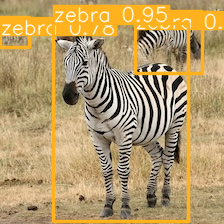

In [48]:
african_model = YOLO(str(save_dir) + "/weights/best.pt")
results = african_model('https://raw.githubusercontent.com/ee292d/labs/main/images/zebra.jpeg')

bgr_array = results[0].plot()
rgb_array = bgr_array[:, :, ::-1]
im.fromarray(rgb_array)

Congratulations, you've just trained your first custom object location model! You can now export and download this like you did for the other models to run it on your Pi.